In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns

In [54]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [55]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [57]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

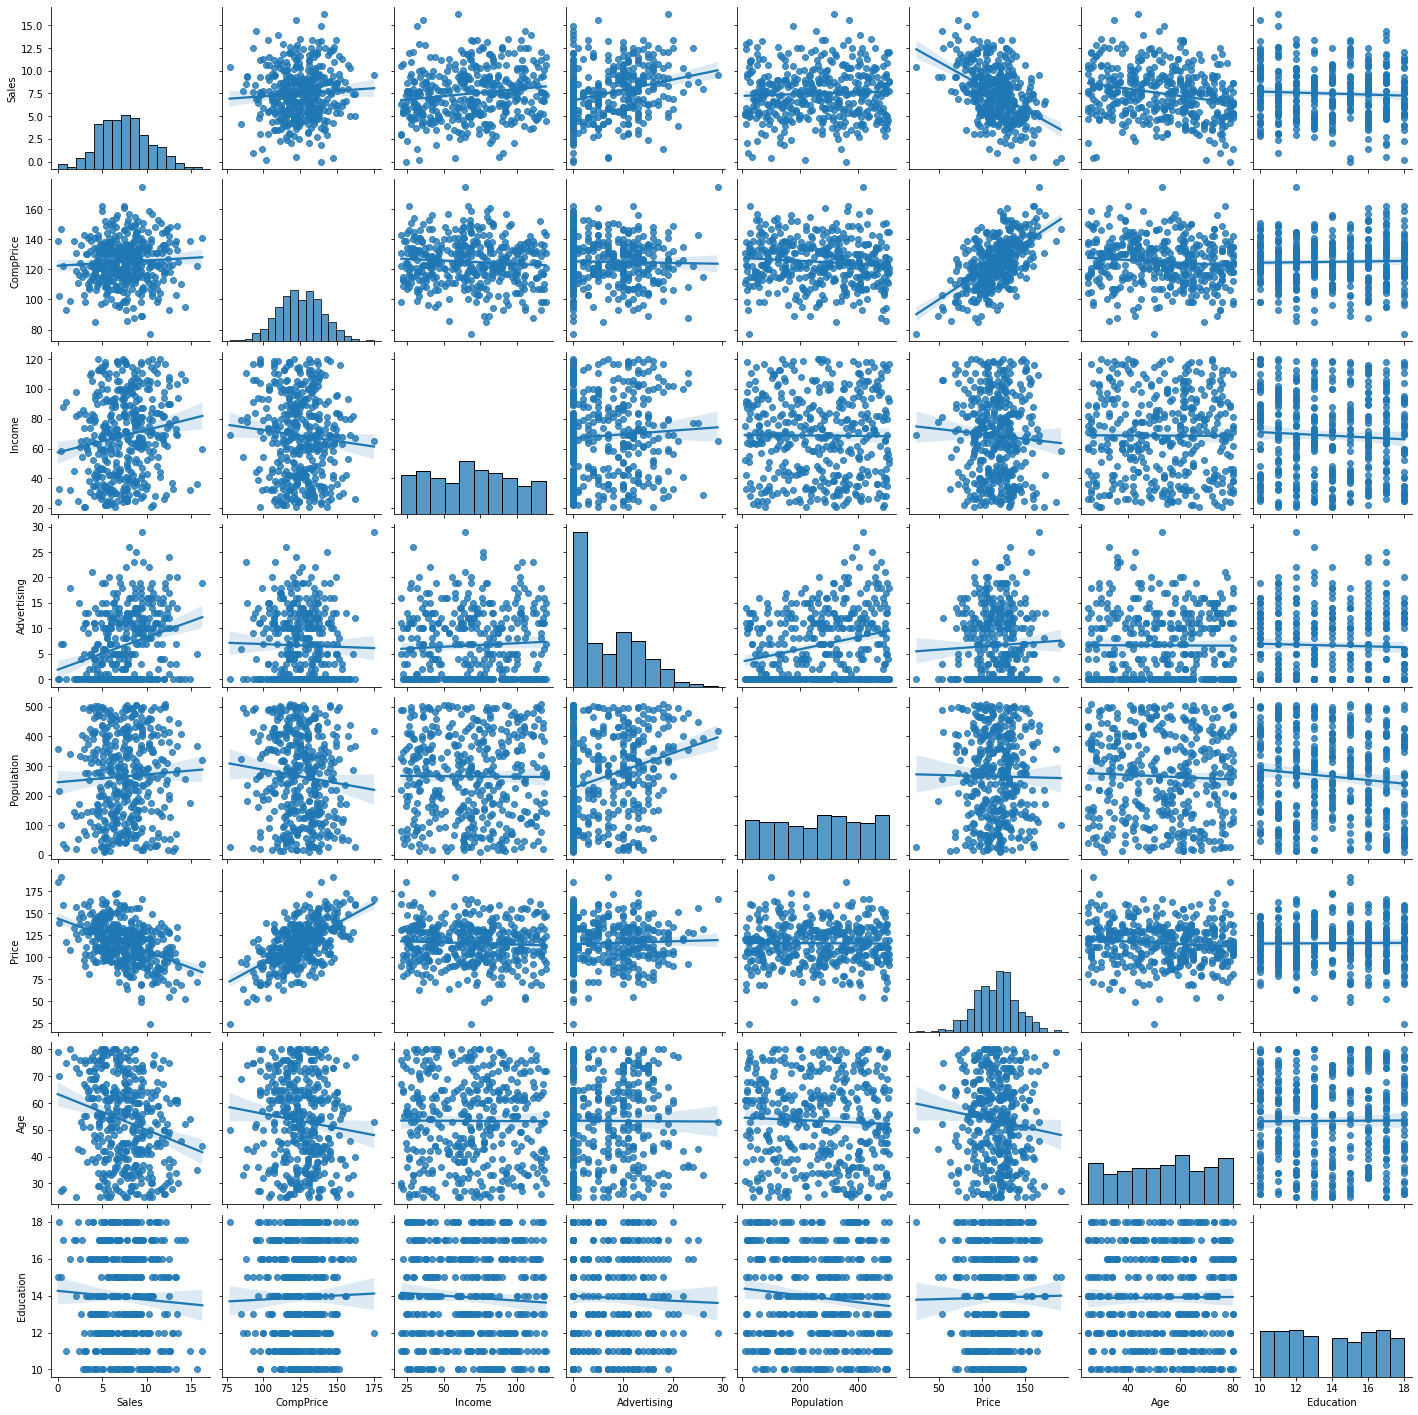

In [59]:
sns.pairplot(df,kind ='reg')

In [60]:
le = LabelEncoder()
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

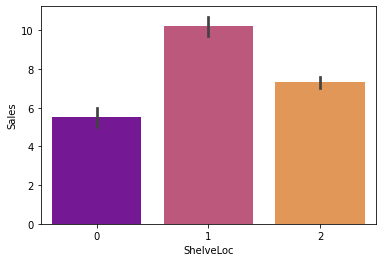

In [68]:
sns.barplot(x='ShelveLoc',y='Sales',data=df,palette='plasma')

In [64]:
df['ShelveLoc'].value_counts()
#see 0 is for bad,1 is for good, 2is for medium

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [70]:
sales_status = []

for i in df['Sales']:
    if i>=7.5:
        sales_status.append('High sales')
    else:
        sales_status.append('Low sales')

df['sales_status'] = sales_status
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,0,42,17,1,1,High sales
1,11.22,111,48,16,260,83,1,65,10,1,1,High sales
2,10.06,113,35,10,269,80,2,59,12,1,1,High sales
3,7.40,117,100,4,466,97,2,55,14,1,1,Low sales
4,4.15,141,64,3,340,128,0,38,13,1,0,Low sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High sales
396,6.14,139,23,3,37,120,2,55,11,0,1,Low sales
397,7.41,162,26,12,368,159,2,40,18,1,1,Low sales
398,5.94,100,79,7,284,95,0,50,12,1,1,Low sales


In [79]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

# Decision Tree Classifier

In [80]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.20, random_state=42)

In [93]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=2)

In [94]:
tree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(max_depth=2)

In [95]:
tree_pred = tree.predict(Xtest)

In [96]:
np.mean(tree_pred==Ytest)

0.6625

[Text(0.5, 0.8333333333333334, 'Population <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [156, 164]\nclass = Low Sales'),
 Text(0.25, 0.5, 'Advertising <= 253.5\ngini = 0.162\nsamples = 45\nvalue = [41, 4]\nclass = High Sales'),
 Text(0.125, 0.16666666666666666, 'gini = 0.32\nsamples = 20\nvalue = [16, 4]\nclass = High Sales'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = High Sales'),
 Text(0.75, 0.5, 'Price <= 0.5\ngini = 0.487\nsamples = 275\nvalue = [115, 160]\nclass = Low Sales'),
 Text(0.625, 0.16666666666666666, 'gini = 0.26\nsamples = 65\nvalue = [10, 55]\nclass = Low Sales'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 210\nvalue = [105, 105]\nclass = High Sales')]

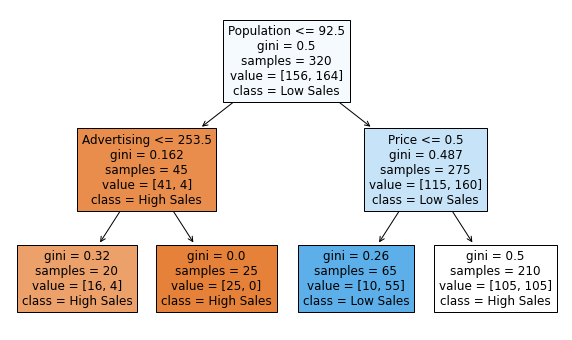

In [99]:
plt.figure(figsize=(10,6))
cn = ['High Sales','Low Sales']
plot_tree(tree,feature_names = df.columns,class_names = cn,filled=True)

In [101]:
print(classification_report(tree_pred,Ytest))

              precision    recall  f1-score   support

  High sales       0.98      0.62      0.76        68
   Low sales       0.30      0.92      0.45        12

    accuracy                           0.66        80
   macro avg       0.64      0.77      0.60        80
weighted avg       0.87      0.66      0.71        80



In [102]:
score = accuracy_score(tree_pred,Ytest)
score

0.6625

In [103]:
pd.crosstab(tree_pred,Ytest)

sales_status,High sales,Low sales
row_0,,
High sales,42,26
Low sales,1,11


# Decision Tree Regreesor

In [115]:
X1 = df.iloc[:,1:-1]
Y1 = df.iloc[:,0]

In [119]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [120]:
X1train,X1test,Y1train,Y1test=train_test_split(X1,Y1,test_size=0.20, random_state=42)

In [121]:
tree_reg.fit(X1train,Y1train)

DecisionTreeRegressor(max_depth=2)

In [129]:
tree_reg_pred = tree_reg.predict(X1test)
tree_reg_pred

array([ 7.86076923,  5.01265625,  7.5080198 ,  5.01265625,  7.5080198 ,
        5.01265625, 10.35609756,  7.86076923,  7.5080198 ,  7.5080198 ,
        7.5080198 ,  7.5080198 , 10.35609756,  7.5080198 ,  7.5080198 ,
       10.35609756,  7.5080198 , 10.35609756,  7.5080198 ,  7.5080198 ,
       10.35609756,  7.5080198 ,  5.01265625,  7.5080198 ,  5.01265625,
        7.5080198 ,  7.5080198 ,  7.86076923,  7.5080198 ,  7.5080198 ,
        7.5080198 ,  7.5080198 ,  7.5080198 ,  5.01265625,  7.5080198 ,
        7.5080198 ,  5.01265625,  7.5080198 ,  7.5080198 ,  5.01265625,
        5.01265625,  7.5080198 , 10.35609756, 10.35609756,  7.5080198 ,
        7.5080198 ,  7.5080198 , 10.35609756,  7.5080198 ,  7.5080198 ,
       10.35609756,  7.5080198 ,  7.5080198 ,  7.5080198 ,  7.5080198 ,
        5.01265625,  7.5080198 ,  7.5080198 , 10.35609756,  7.5080198 ,
        7.5080198 ,  7.5080198 ,  7.86076923,  7.5080198 ,  7.5080198 ,
        7.5080198 ,  7.5080198 ,  7.5080198 ,  5.01265625,  7.50

[Text(0.5, 0.8333333333333334, 'Population <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [156, 164]\nclass = Low Sales'),
 Text(0.25, 0.5, 'Advertising <= 253.5\ngini = 0.162\nsamples = 45\nvalue = [41, 4]\nclass = High Sales'),
 Text(0.125, 0.16666666666666666, 'gini = 0.32\nsamples = 20\nvalue = [16, 4]\nclass = High Sales'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = High Sales'),
 Text(0.75, 0.5, 'Price <= 0.5\ngini = 0.487\nsamples = 275\nvalue = [115, 160]\nclass = Low Sales'),
 Text(0.625, 0.16666666666666666, 'gini = 0.26\nsamples = 65\nvalue = [10, 55]\nclass = Low Sales'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 210\nvalue = [105, 105]\nclass = High Sales')]

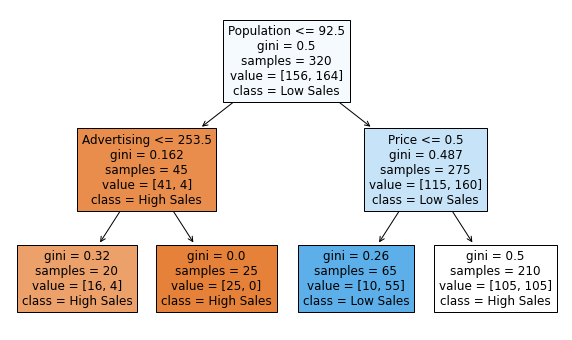

In [132]:
plt.figure(figsize=(10,6))
plot_tree(tree,feature_names = df.columns,class_names = cn,filled=True)